In [1]:
import folium
import requests
import seaborn as sb
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
gun_info_table = pd.read_csv("https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv")
gun_info_table.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2019-11,Alabama,26375.0,472.0,24005.0,19212.0,1161.0,1286,0.0,32.0,26.0,1.0,3017.0,1968.0,20.0,0.0,0.0,0.0,0.0,0.0,46.0,31.0,3.0,1.0,1.0,0.0,77657
1,2019-11,Alaska,238.0,10.0,3003.0,2980.0,368.0,260,0.0,0.0,0.0,0.0,152.0,86.0,2.0,32.0,28.0,0.0,0.0,0.0,30.0,20.0,4.0,0.0,0.0,0.0,7213
2,2019-11,Arizona,4524.0,650.0,13775.0,8180.0,1131.0,1182,0.0,6.0,6.0,1.0,1199.0,558.0,6.0,86.0,14.0,0.0,0.0,0.0,20.0,9.0,4.0,1.0,0.0,0.0,31352
3,2019-11,Arkansas,2319.0,649.0,6814.0,9628.0,321.0,542,4.0,21.0,8.0,0.0,1145.0,1707.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,20.0,2.0,0.0,2.0,0.0,23192
4,2019-11,California,29002.0,0.0,34345.0,25063.0,3564.0,0,0.0,0.0,0.0,0.0,462.0,312.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92765


In [3]:
pruned_info_table = pd.DataFrame()

pruned_info_table['Year_Month'] = gun_info_table['month']
pruned_info_table['State'] = gun_info_table['state']
pruned_info_table['Hand_Gun'] = gun_info_table['handgun']
pruned_info_table['Long_Gun'] = gun_info_table['long_gun']
pruned_info_table['Multiple_Guns'] = gun_info_table['multiple']

pruned_info_table['State'] = pruned_info_table['State'].astype(str)

to_drop = []

for row in pruned_info_table.index:
    state = pruned_info_table.at[row, 'State']
    if state == 'Guam' or state == 'Mariana Islands' or state == 'Puerto Rico' or state == 'Virgin Islands':
        to_drop.append(row)
        
pruned_info_table.drop(to_drop, inplace = True)

pruned_info_table = pruned_info_table.fillna(0)

pruned_info_table['Hand_Gun'] = pruned_info_table['Hand_Gun'].astype(int)
pruned_info_table['Long_Gun'] = pruned_info_table['Long_Gun'].astype(int)

pruned_info_table.head()

,Year_Month,State,Hand_Gun,Long_Gun,Multiple_Guns
0,2019-11,Alabama,24005,19212,1286
1,2019-11,Alaska,3003,2980,260
2,2019-11,Arizona,13775,8180,1182
3,2019-11,Arkansas,6814,9628,542
4,2019-11,California,34345,25063,0


In [4]:
pruned_info_table["Year"], pruned_info_table["Month"] = pruned_info_table["Year_Month"].str.split("-").str
pruned_info_table = pruned_info_table.reindex(columns=['Year', 'State', 'Hand_Gun', 'Long_Gun', 'Multiple_Guns'])

pruned_info_table.head()

,Year,State,Hand_Gun,Long_Gun,Multiple_Guns
0,2019,Alabama,24005,19212,1286
1,2019,Alaska,3003,2980,260
2,2019,Arizona,13775,8180,1182
3,2019,Arkansas,6814,9628,542
4,2019,California,34345,25063,0


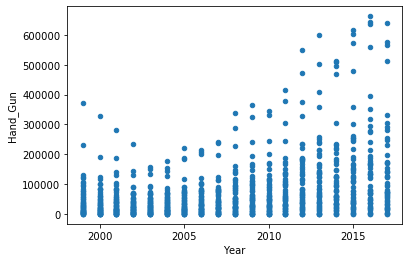

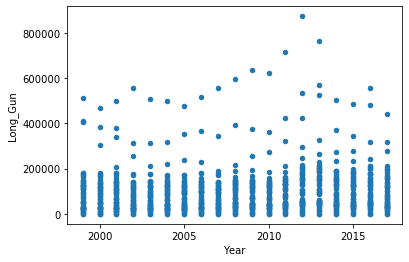

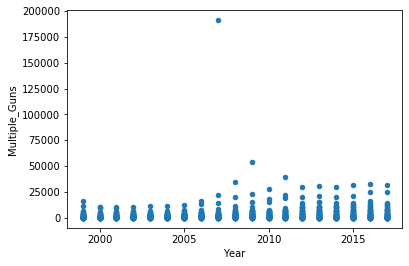

In [5]:
to_drop = []

for row in pruned_info_table.index:
    year = pd.to_numeric(pruned_info_table.at[row, 'Year'])
    if year < 1999 or year > 2017:
        to_drop.append(row)
        
pruned_info_table.drop(to_drop, inplace = True)
pruned_info_table.reset_index(drop = True, inplace = True)
pruned_info_table[['Year']] = pruned_info_table[['Year']].apply(pd.to_numeric) 


grouped_gun_info = pruned_info_table.groupby(['Year', 'State'], as_index = False)[['Hand_Gun', 'Long_Gun', 'Multiple_Guns']].sum()

handgun_info_scatter_plot = grouped_gun_info.plot.scatter(x = 'Year', y = 'Hand_Gun')
handgun_info_scatter_plot.locator_params(integer=True)
longgun_info_scatter_plot = grouped_gun_info.plot.scatter(x = 'Year', y = 'Long_Gun')
longgun_info_scatter_plot.locator_params(integer=True)
multiple_guns_info_scatter_plot = grouped_gun_info.plot.scatter(x = 'Year', y = 'Multiple_Guns')
multiple_guns_info_scatter_plot.locator_params(integer=True)

handgun_info_scatter_plot
longgun_info_scatter_plot
multiple_guns_info_scatter_plot

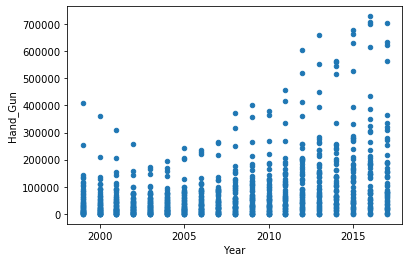

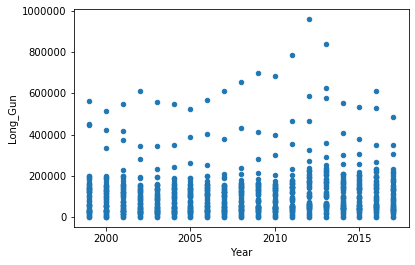

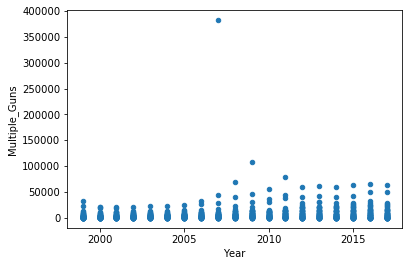

In [6]:
pruned_info_table['Hand_Gun'] = pruned_info_table['Hand_Gun'].astype(float)
pruned_info_table['Long_Gun'] = pruned_info_table['Long_Gun'].astype(float)

for row in pruned_info_table.index:
    hand_gun = pruned_info_table.at[row, 'Hand_Gun']
    long_gun = pruned_info_table.at[row, 'Long_Gun']
    multiple = pruned_info_table.at[row, 'Multiple_Guns']
    
    updated_hand_gun = 1.1 * hand_gun
    updated_long_gun = 1.1 * long_gun
    updated_multiple = 2 * multiple
    
    pruned_info_table.at[row, 'Hand_Gun'] = updated_hand_gun
    pruned_info_table.at[row, 'Long_Gun'] = updated_long_gun
    pruned_info_table.at[row, 'Multiple_Guns'] = updated_multiple

grouped_gun_info = pruned_info_table.groupby(['Year', 'State'], as_index = False)[['Hand_Gun', 'Long_Gun', 'Multiple_Guns']].sum()

handgun_info_scatter_plot = grouped_gun_info.plot.scatter(x = 'Year', y = 'Hand_Gun')
handgun_info_scatter_plot.locator_params(integer=True)
longgun_info_scatter_plot = grouped_gun_info.plot.scatter(x = 'Year', y = 'Long_Gun')
longgun_info_scatter_plot.locator_params(integer=True)
multiple_guns_info_scatter_plot = grouped_gun_info.plot.scatter(x = 'Year', y = 'Multiple_Guns')
multiple_guns_info_scatter_plot.locator_params(integer=True)

handgun_info_scatter_plot
longgun_info_scatter_plot
multiple_guns_info_scatter_plot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


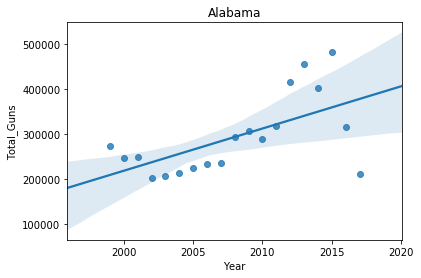

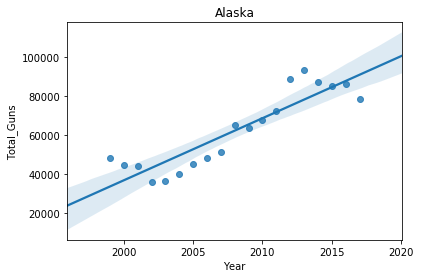

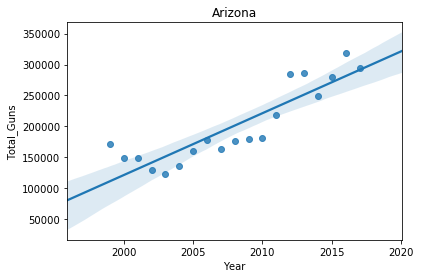

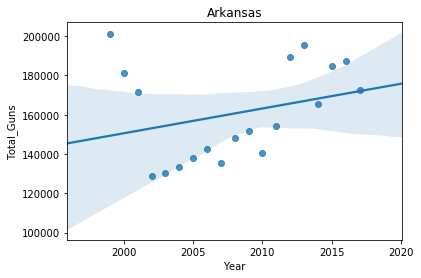

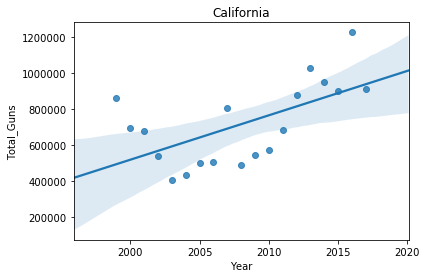

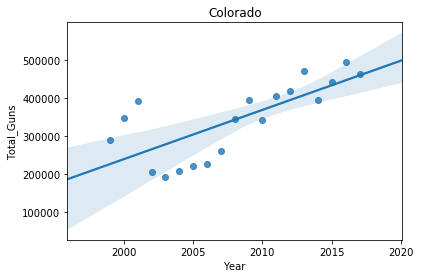

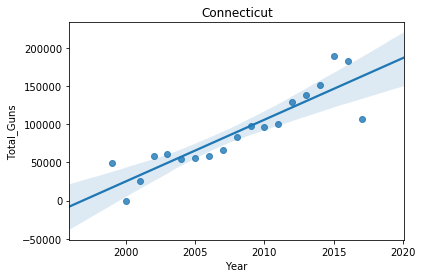

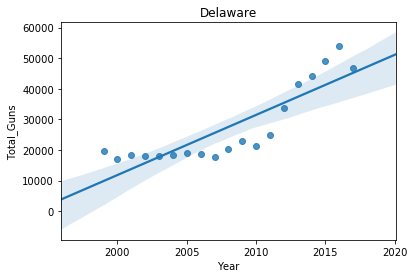

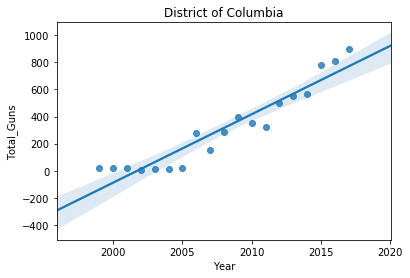

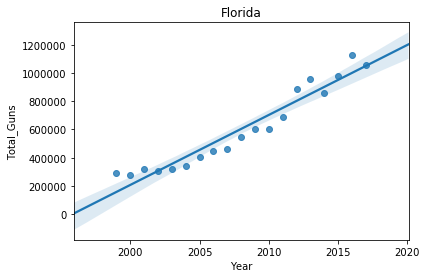

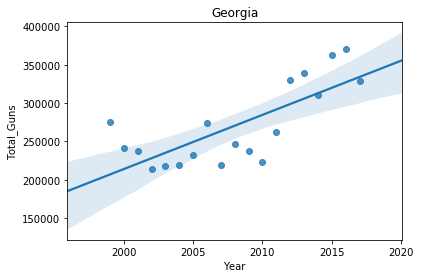

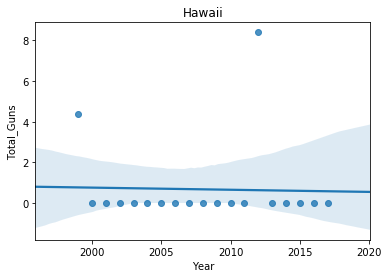

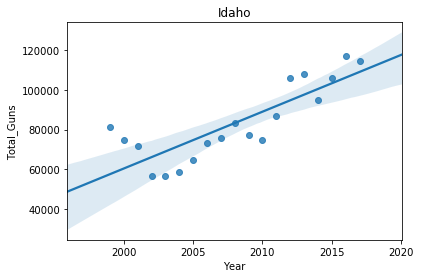

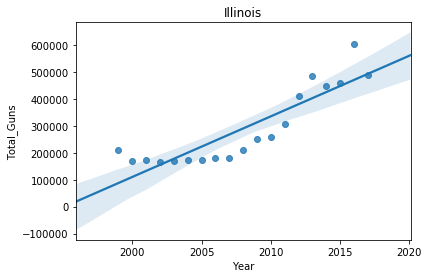

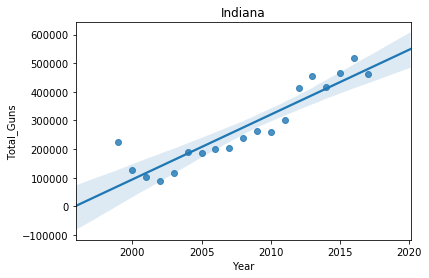

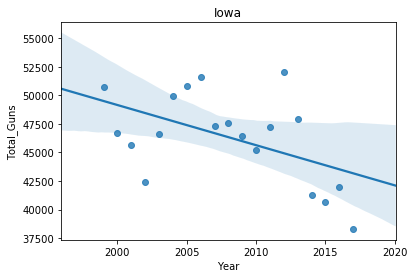

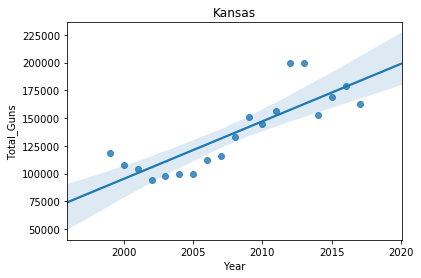

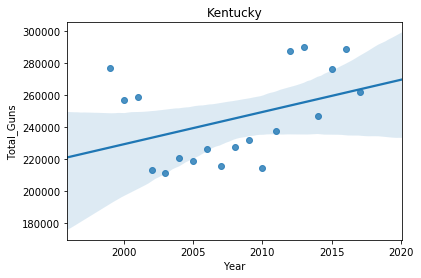

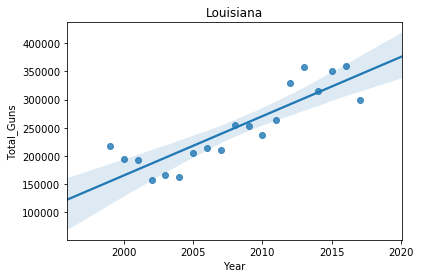

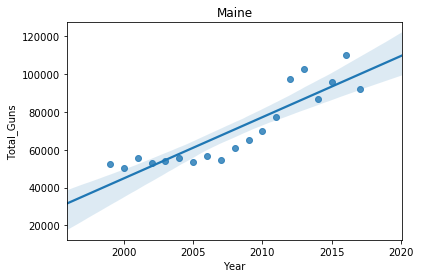

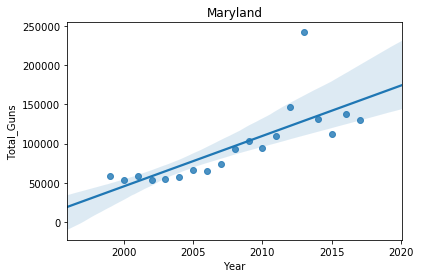

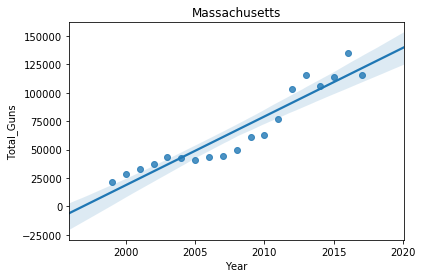

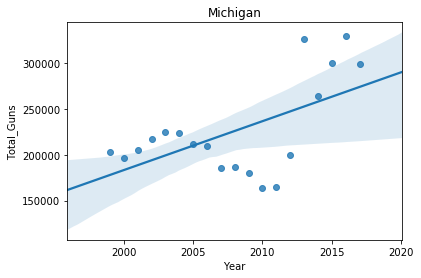

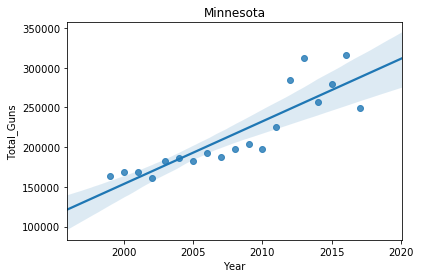

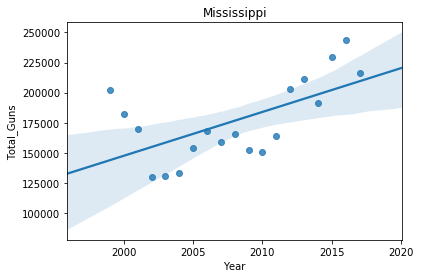

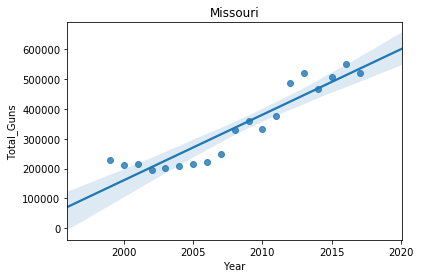

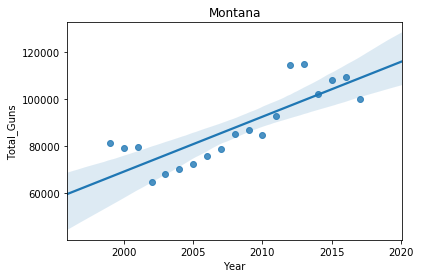

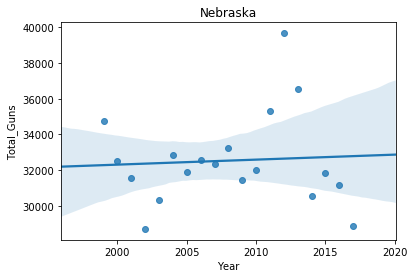

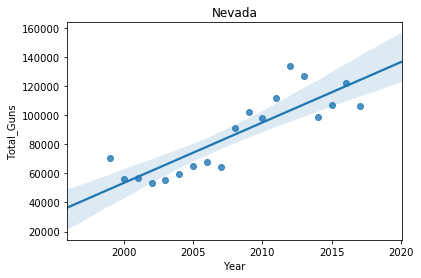

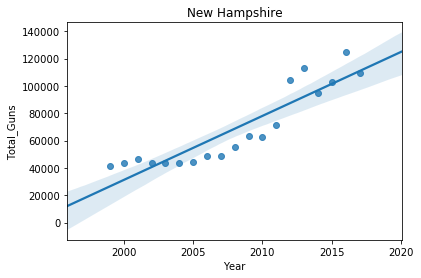

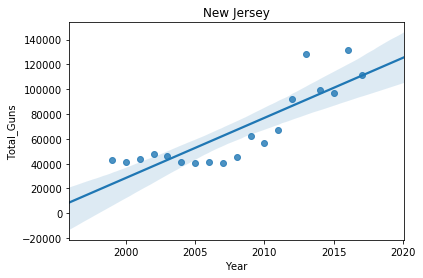

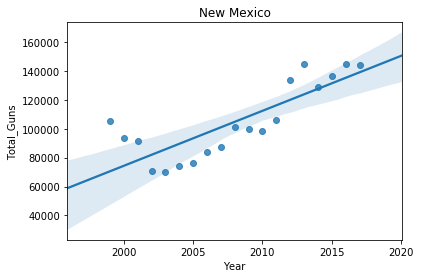

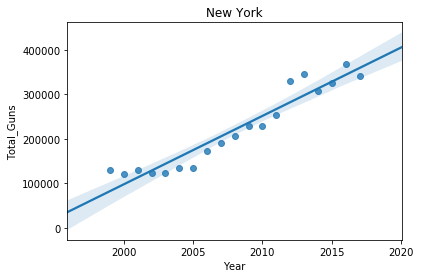

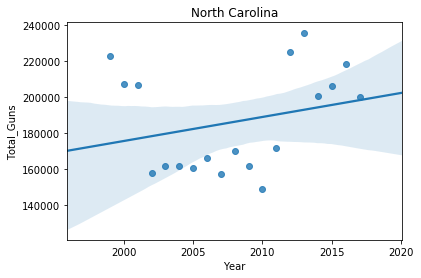

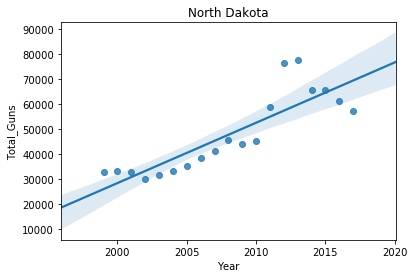

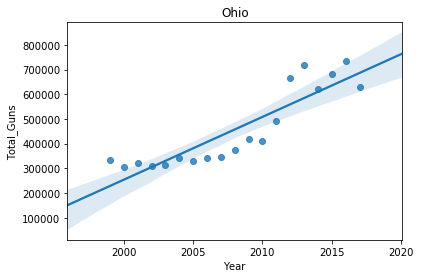

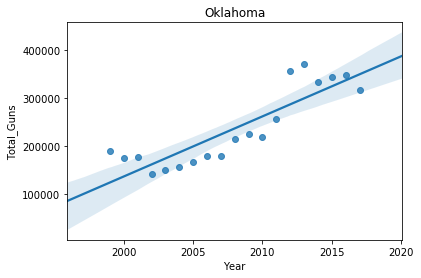

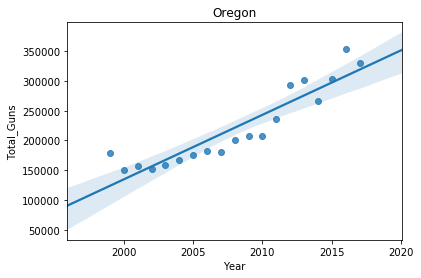

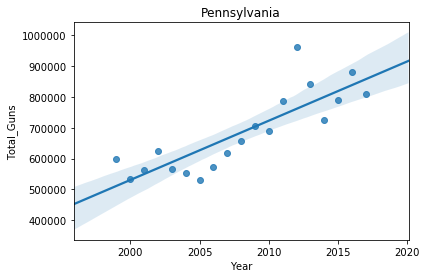

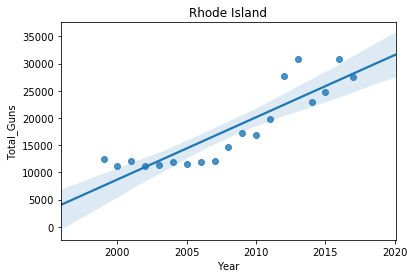

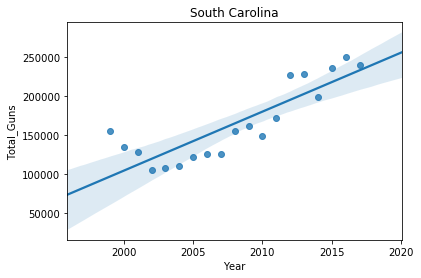

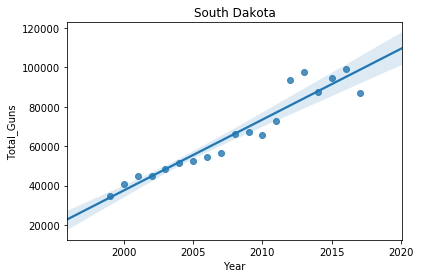

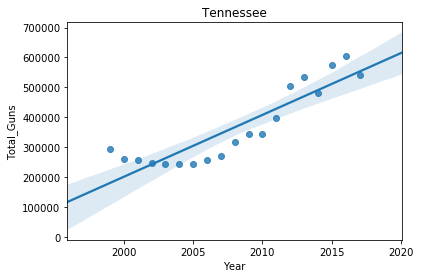

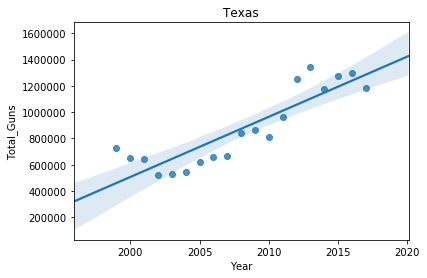

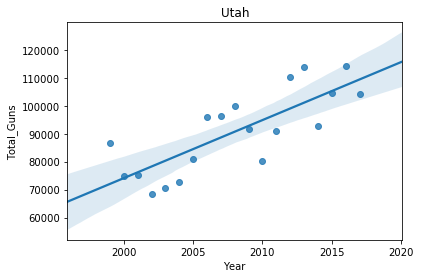

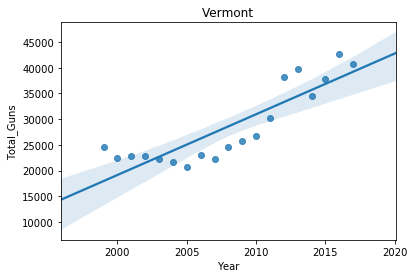

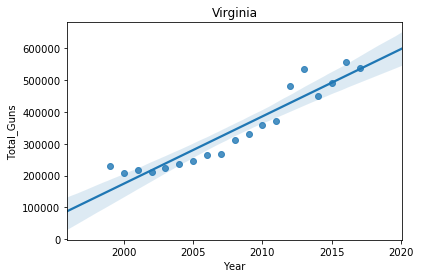

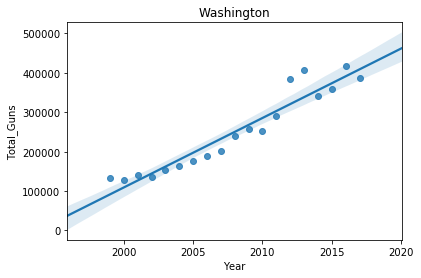

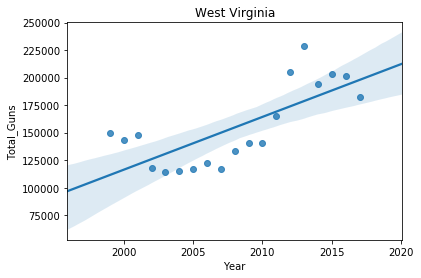

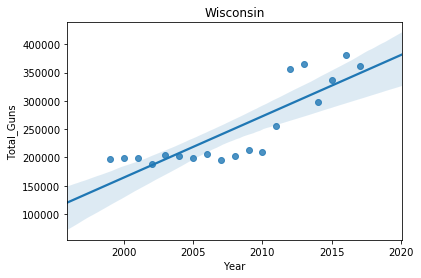

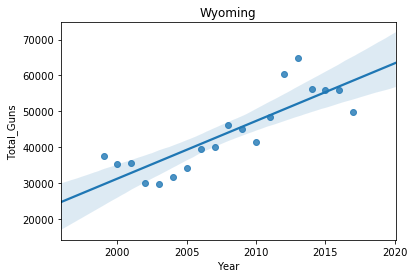

In [7]:
total_guns_by_state = pd.DataFrame()

total_guns_by_state = grouped_gun_info

total_guns_by_state_grouped = total_guns_by_state.groupby(['State', 'Year'], as_index = False)[['Hand_Gun', 'Long_Gun', 'Multiple_Guns']].sum()
total_guns_by_state_grouped["Total_Guns"] = np.nan

for row in total_guns_by_state_grouped.index:
    hand_gun = total_guns_by_state_grouped.at[row, 'Hand_Gun']
    long_gun = total_guns_by_state_grouped.at[row, 'Long_Gun']
    multiple = total_guns_by_state_grouped.at[row, 'Multiple_Guns']
    
    total_guns = hand_gun + long_gun + multiple
    
    total_guns_by_state_grouped.at[row, 'Total_Guns'] = total_guns
    
total_guns_by_state_grouped.drop(columns = ['Hand_Gun', 'Long_Gun', 'Multiple_Guns'], inplace = True)

total_guns_by_state_grouped_mult = total_guns_by_state_grouped.groupby('State')

for name, group in total_guns_by_state_grouped_mult:
    plt.figure()
    fig = sb.regplot(x = 'Year', y = 'Total_Guns', data = group)
    fig.set_title(name)
total_guns_by_state_grouped_mult

In [8]:
total_guns_by_state = pd.DataFrame()

total_guns_by_state = grouped_gun_info

total_guns_by_state.drop(columns = 'Year', inplace = True)
total_guns_by_state_grouped = total_guns_by_state.groupby(['State'], as_index = False)[['Hand_Gun', 'Long_Gun', 'Multiple_Guns']].sum()
total_guns_by_state_grouped["Total_Guns"] = np.nan

for row in total_guns_by_state_grouped.index:
    hand_gun = total_guns_by_state_grouped.at[row, 'Hand_Gun']
    long_gun = total_guns_by_state_grouped.at[row, 'Long_Gun']
    multiple = total_guns_by_state_grouped.at[row, 'Multiple_Guns']
    
    total_guns = hand_gun + long_gun + multiple
    
    total_guns_by_state_grouped.at[row, 'Total_Guns'] = total_guns
    
total_guns_by_state_grouped.drop(columns = ['Hand_Gun', 'Long_Gun', 'Multiple_Guns'], inplace = True)

stateList = ["AL","AK","AZ","AR","CA","CO","CT","DE","DC","FL","GA","HI",
             "ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI",
             "MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC",
             "ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT",
             "VT","VA","WA","WV","WI","WY"]


total_guns_by_state_grouped['State_Codes'] = stateList

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

total_guns_by_state_map = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=total_guns_by_state_grouped,
    columns=['State_Codes', 'Total_Guns'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Guns Purchased from 1999-2017'
).add_to(total_guns_by_state_map)

folium.LayerControl().add_to(total_guns_by_state_map)

total_guns_by_state_map

In [9]:
crime_info = pd.read_csv('CDC_Violent_Gun_Crime.csv')
crime_info.head()

,Sex,Race,State,Ethnicity,Age Group,First Year,Last Year,Cause of Death,Year,Deaths,Population,Crude Rate,Age-Adjusted Rate
0,Both Sexes,All Races,Alabama,Both,All Ages,1999,2017,Violence-Related Firearm,1999.0,731,4430143,16.50,16.3610778585975
1,Both Sexes,All Races,Alaska,Both,All Ages,1999,2017,Violence-Related Firearm,1999.0,83,624781,13.28,15.1825201949224
2,Both Sexes,All Races,Arizona,Both,All Ages,1999,2017,Violence-Related Firearm,1999.0,796,5023824,15.84,15.7922403729209
3,Both Sexes,All Races,Arkansas,Both,All Ages,1999,2017,Violence-Related Firearm,1999.0,357,2651860,13.46,13.4716103052036
4,Both Sexes,All Races,California,Both,All Ages,1999,2017,Violence-Related Firearm,1999.0,2976,33499204,8.88,9.03234048175848


In [10]:
to_drop = ['Sex', 'Race', 'Ethnicity', 'First Year', 'Age Group', 'Last Year', 'Cause of Death']
crime_info.drop(columns = to_drop, inplace = True)

crime_info = crime_info[['Year', 'State', 'Population', 'Deaths', 'Crude Rate', 'Age-Adjusted Rate']]

crime_info = crime_info.dropna()
crime_info['Year'] = crime_info['Year'].astype(int)

crime_info.head()

,Year,State,Population,Deaths,Crude Rate,Age-Adjusted Rate
0,1999,Alabama,4430143,731,16.50,16.3610778585975
1,1999,Alaska,624781,83,13.28,15.1825201949224
2,1999,Arizona,5023824,796,15.84,15.7922403729209
3,1999,Arkansas,2651860,357,13.46,13.4716103052036
4,1999,California,33499204,2976,8.88,9.03234048175848


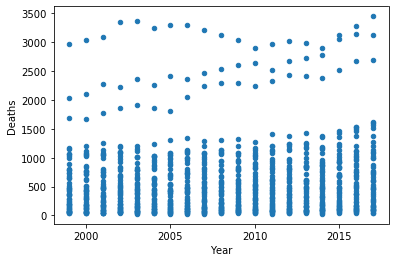

In [11]:
deaths_info = pd.DataFrame()
deaths_info = crime_info[['Year', 'State', 'Deaths']]

deaths_info_grouped_by_year = deaths_info.groupby(['Year', 'State'], as_index = False)[['Deaths']].sum()

handgun_info_scatter_plot = deaths_info_grouped_by_year.plot.scatter(x = 'Year', y = 'Deaths')
handgun_info_scatter_plot.locator_params(integer=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


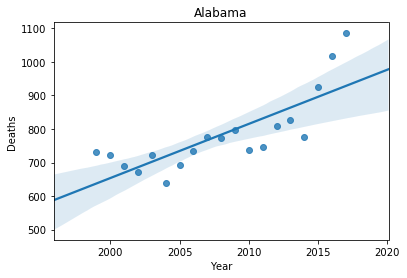

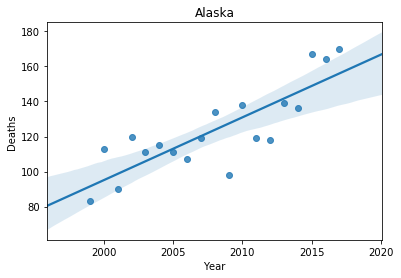

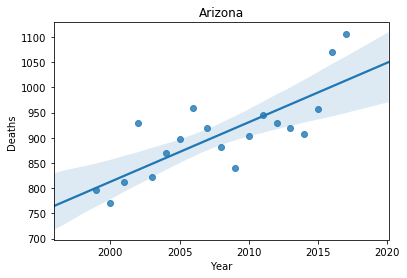

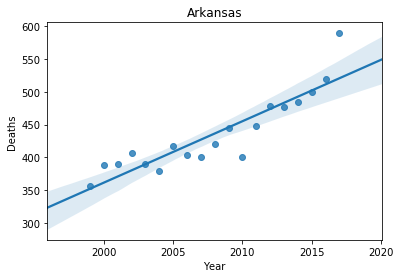

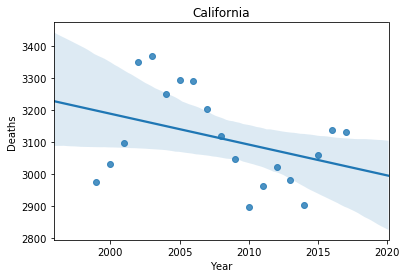

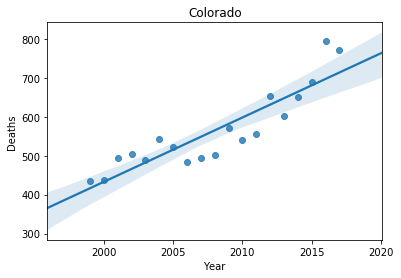

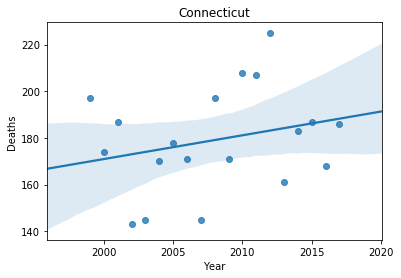

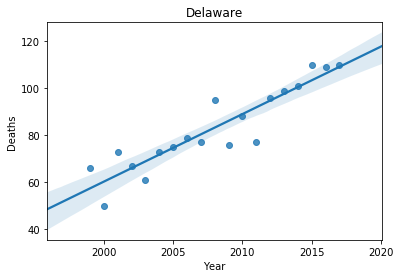

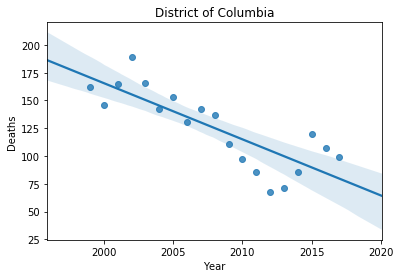

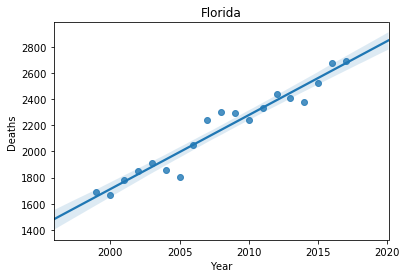

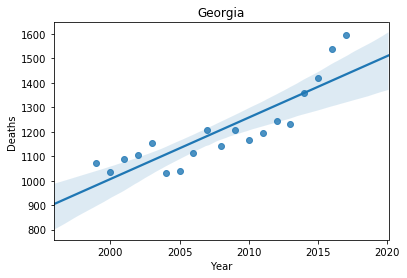

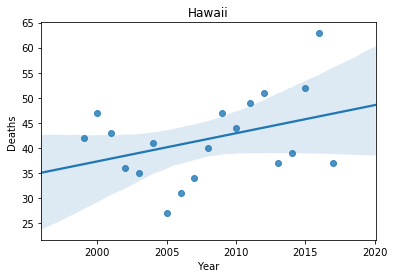

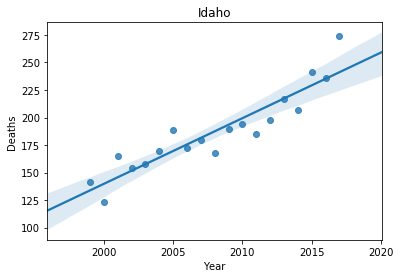

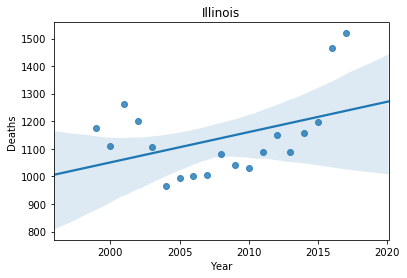

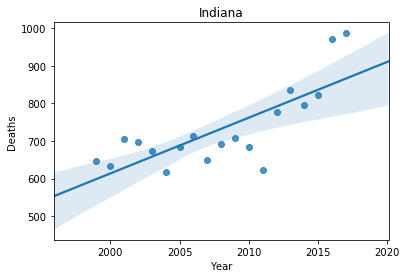

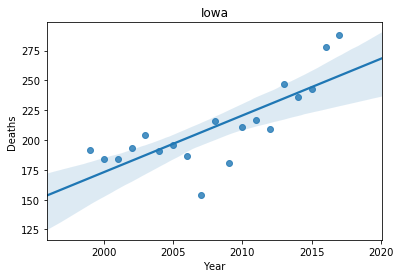

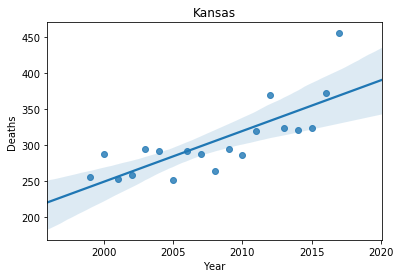

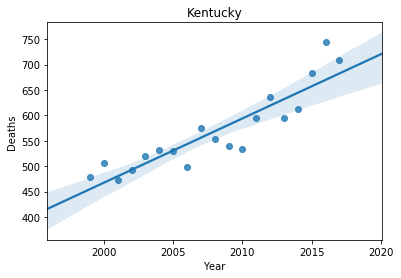

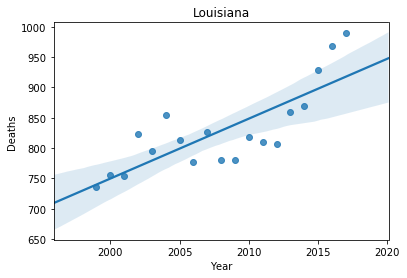

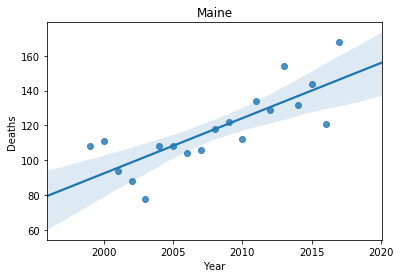

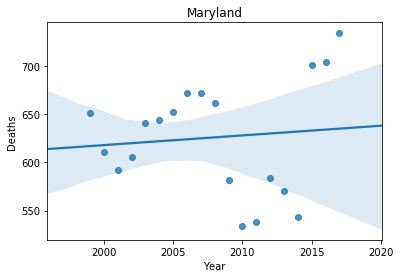

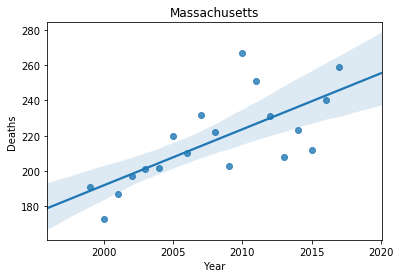

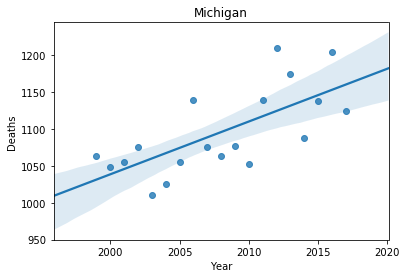

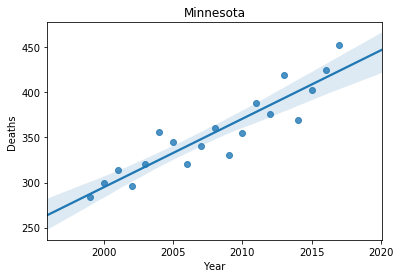

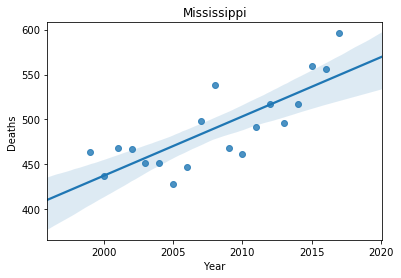

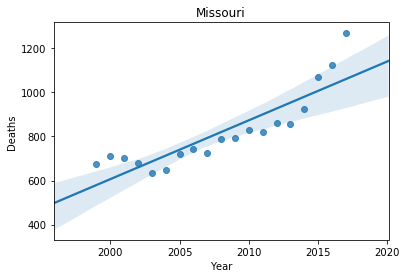

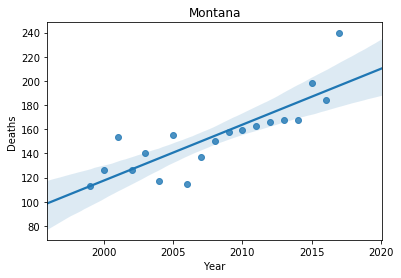

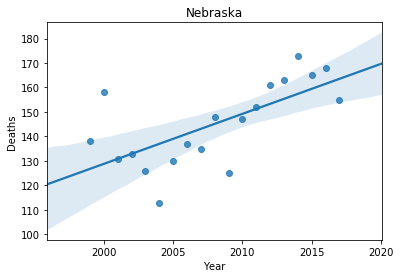

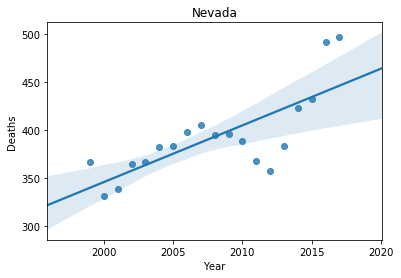

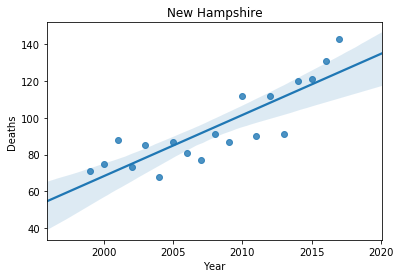

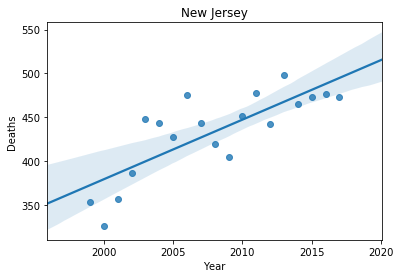

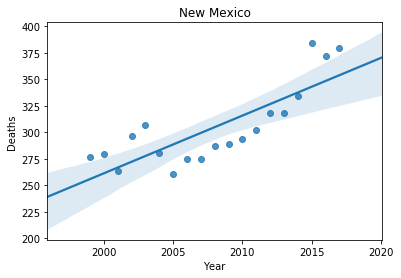

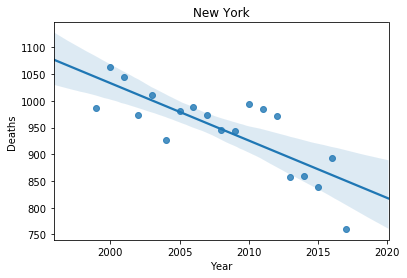

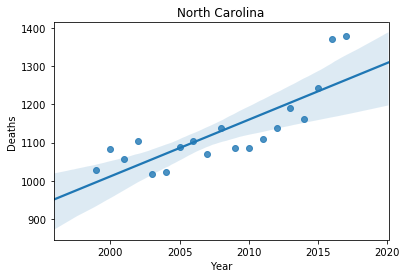

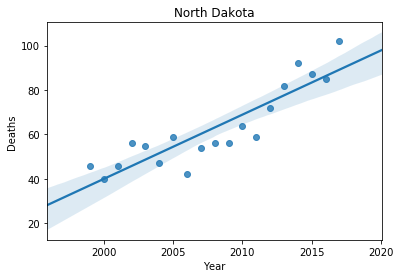

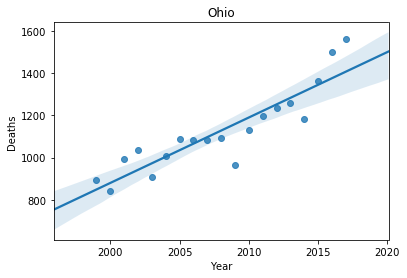

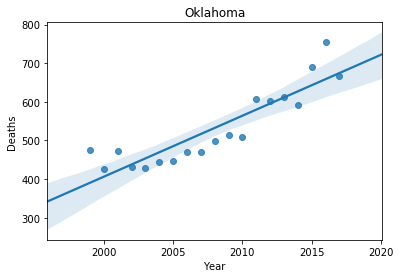

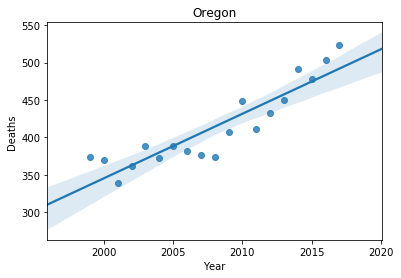

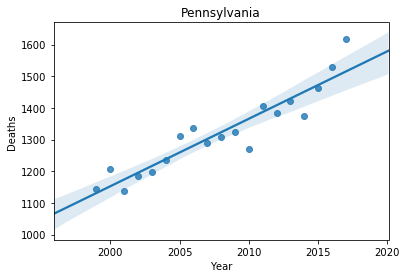

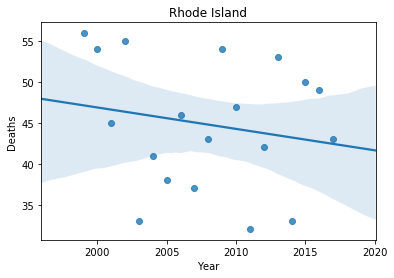

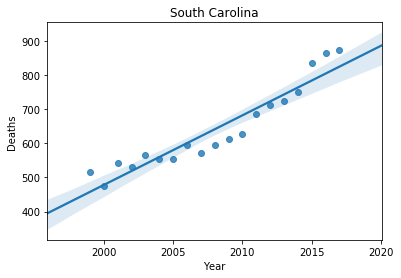

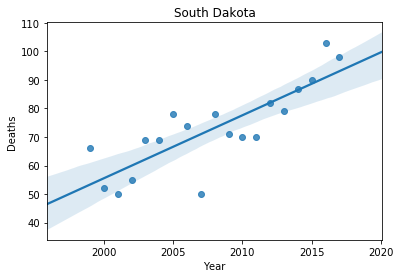

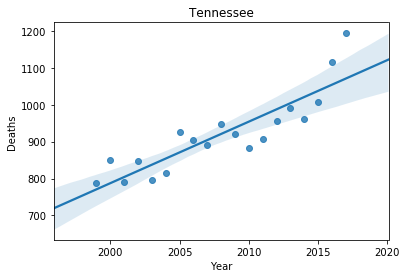

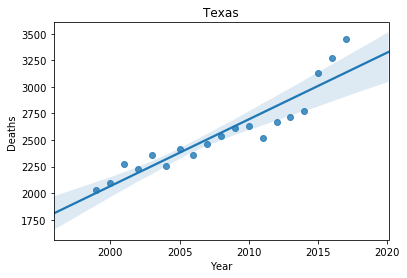

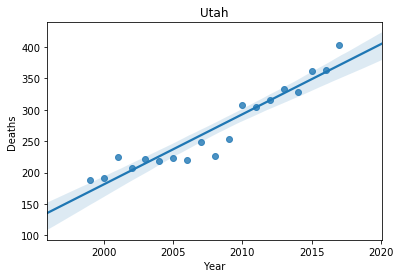

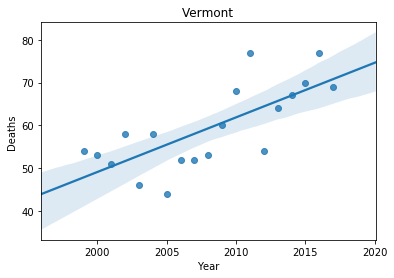

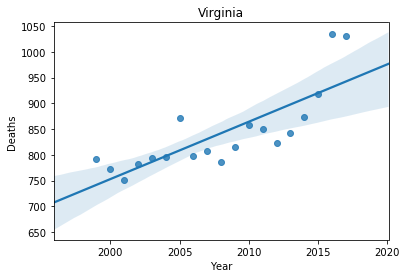

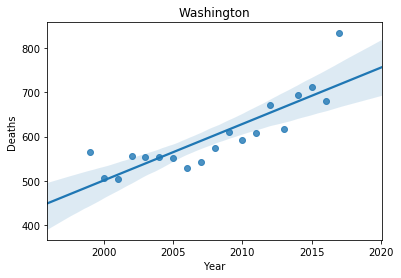

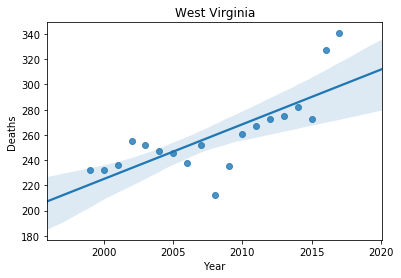

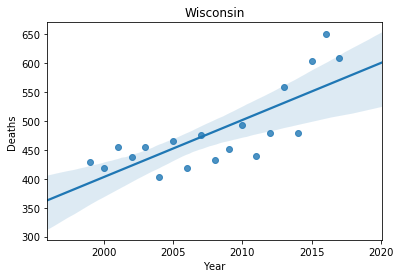

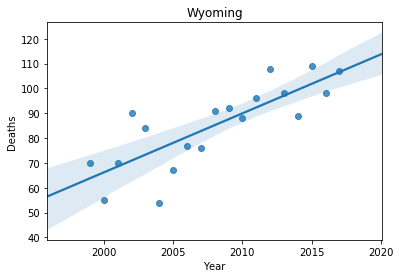

In [12]:
deaths_info_grouped_by_state = deaths_info_grouped_by_year.groupby('State')

for name, group in deaths_info_grouped_by_state:
    plt.figure()
    fig = sb.regplot(x = 'Year', y = 'Deaths', data = group)
    fig.set_title(name)

In [13]:
deaths_info_grouped_by_state = deaths_info_grouped_by_year.groupby(['State'], as_index = False)[['Deaths']].sum()

deaths_info_grouped_by_state['State_Codes'] = stateList

death_info_by_state_map = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=deaths_info_grouped_by_state,
    columns=['State_Codes', 'Deaths'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Gun-Related Homicides from 1999-2017'
).add_to(death_info_by_state_map)

folium.LayerControl().add_to(death_info_by_state_map)

death_info_by_state_map